# Binary Trees 

This notebook contains a implementation of binary trees first without balancing and then with balancing. 

## Parent Classes 

In [160]:
class Binary_Node:
    def __init__(self,x):
        self.item = x
        self.left = None 
        self.right = None
        self.parent = None 

    def subtree_iter(self):
        if self.left: yield from self.left.subtree_iter()
        yield self.item
        if self.right: yield from self.right.subtree_iter()

    def subtree_first(self):
        if self.left: return self.left.subtree_first()
        else: return self

    def subtree_last(self):
        if self.right: return self.right.subtree_last()
        else: return self 

    def successor(self):
        if self.right: return self.right.subtree_first()
        while self.parent and (self.parent.right is self):
            self = self.parent
    
        return self.parent 
    
    def predecessor(self):
        if self.left: return self.left.subtree_last()
        while self.parent and (self.parent.left is self):
            self = self.parent 

        return self.parent 
    
    def subtree_insert_before(self,node):
        if self.left:
            A = self.left.subtree_last()
            A.right, node.parent = node, A
        else:
            self.left, node.parent = node, self

    def subtree_insert_after(self,node):
        if self.right:
            A = self.right.subtree_first()
            A.left, node.parent = node, A
        else:
            self.right, node.parent = node, self

    def subtree_delete(self):
        if self.left or self.right:
            if self.left: replace_node = self.predecessor()
            else: replace_node = self.successor()
            self.item, replace_node.item = replace_node.item, self.item
            return replace_node.subtree_delete()
        
        if self.parent:
            if self.parent.left is self: self.parent.left = None 
            else: self.parent.right = None 

        return self

    
class Binary_Tree:
    def __init__(T, Node_Type = Binary_Node):
        T.root = None
        T.size = 0
        T.Node_Type = Node_Type

    def __len__(T): return T.size
    def __iter__(T):
        if T.root:
            for A in T.root.subtree_iter():
                yield A

In [161]:
def node_info(node):
    if node.item:
        print(f"item: {node.item}")

    if node.parent:
        print(f"parent: {node.parent.item}")

    if node.left:
        print(f"left: {node.left.item}")

    if node.right:
        print(f"right: {node.right.item}")

    print("\n")

## Exercises 1

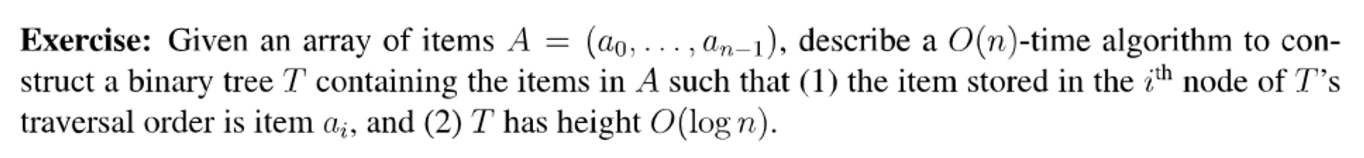

### Solution 

This problem can be solved recursively. Start with locating the item in the middle of the array and add it the root binary tree. Then add everything to the left of the middle of the array if allocated to the left subtree of the root node. Everything to the right of the middle of the array gets to allocated to the right subtree of the root node. This ensures roughly an O(logn) height and O(n) execution time. 

The code for which is presented below:

In [162]:

def build_subtree(A,subtree,left=True):    
    c=int((len(A)-1)/2)
    
    if subtree.item==None:
        subtree.item=A[c]
    else:
        temp_tree=Binary_Node(A[c])
        if left:
            subtree.left,temp_tree.parent=temp_tree,subtree
            subtree=subtree.left
        else:
            subtree.right,temp_tree.parent=temp_tree,subtree
            subtree=subtree.right

    if c==0:
        if len(A)==2:
            temp_tree2=Binary_Node(A[c+1])
            temp_tree.right,temp_tree2.parent=temp_tree2,temp_tree
    else:
        build_subtree(A[:c],left=True,subtree=subtree)
        build_subtree(A[c+1:],left=False,subtree=subtree)
    

In [163]:
binary_root_node=Binary_Node(None)
build_subtree([1,2,3,4,5,6,7,8,9],binary_root_node)

binary_tree=Binary_Tree()
binary_tree.root=binary_root_node

for i in binary_tree:
    print(i)

1
2
3
4
5
6
7
8
9


## Exercises 2

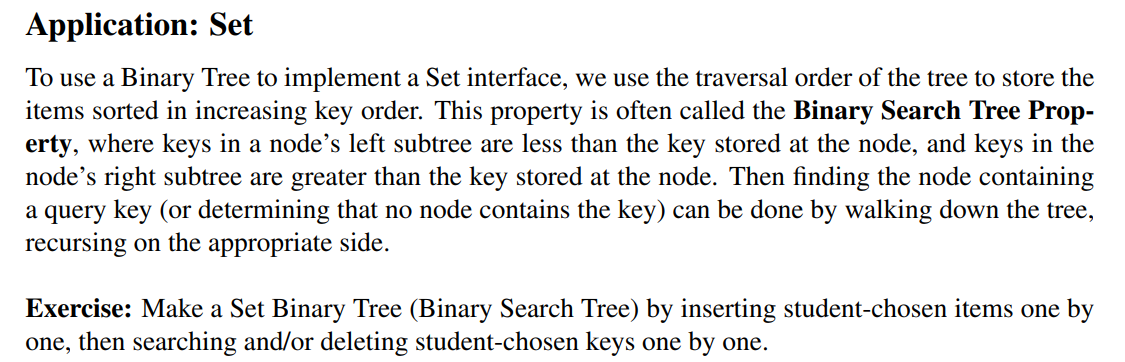

### Solution

The code is presennted below 

In [164]:
class BST_Node(Binary_Node):
    def __init__(self,x):
        super().__init__(x)

    def subtree_insert(self,new_node):
        if new_node.item<self.item:
            if self.left:
                self.left.subtree_insert(new_node)
            else:
                self.left,new_node.parent=new_node,self.left 
        elif new_node.item>self.item:
            if self.right:
                self.right.subtree_insert(new_node)
            else:
                self.right,new_node.parent=new_node,self.right 
        else:
            self.item=new_node.item

    def subtree_find(self,k):
        if self.item<k:
            if self.right:
                return self.right.subtree_find(k)
        elif self.item>k:
            if self.left:
                return self.left.subtree_find(k)
        else:
            return self
        
        return None 
    
    def subtree_find_next(self,k):
        if self.item<k:
            if self.right:
                return self.right.subtree_find(k)
            else:
                return None 
            
        elif self.item>k:
            if self.left:
                return self.left.subtree_find(k)
            else:
                return self
        else:
            return self.successor()
        
    def subtree_find_next(self,k):

        if self.item<=k:
            if self.right: 
                return self.right.subtree_find_next(k)
            else:
                return None 
            
        elif self.left:
            next_node = self.left.subtree_find_next(k)
            if next_node: return next_node
        
        return self
    
    def subtree_find_prev(self,k):
        if self.item>=k:
            if self.left:
                return self.left.subtree_find_prev(k)
            else:
                return None 
            
        elif self.right:
            next_node = self.right.subtree_find_prev(k)
            if next_node: return next_node
        
        return self
        


In [165]:
class Set_Binary_Tree(Binary_Tree):
    def __init__(self):
        super().__init__(BST_Node)

    def iter_order(self):
        #try to understand the point of this method
        yield from self

    def build(self,X):
        for x in X:
            self.insert(x)
        

    def find_min(self):
        if self.root:
            first_node=self.root.subtree_first()
            return first_node.item

    def find_max(self):
        if self.root:
            last_node=self.root.subtree_last()
            return last_node.item
        

    def find(self,k):
        if self.root:
            node = self.root.subtree_find(k)
            if node: return node.item

    def find_next(self,k):
        if self.root:
            node = self.root.subtree_find_next(k)
            if node: return node.item 

    def find_prev(self,k):
        if self.root:
            node = self.root.subtree_find_prev(k)
            if node: return node.item 

    def insert(self,x):
        new_node=self.Node_Type(x)
        if self.root:
            self.root.subtree_insert(new_node)
        else:
            self.root=new_node

        self.size+=1

        return True 

    def delete(self,k):
        delete_node = self.find(k)
        
        if delete_node:
            deleted_node=delete_node.subtree_delete()
            self.size-=1
            if deleted_node.parent is None:
                self.root = None
            return deleted_node.item

In [166]:
bst=Set_Binary_Tree()
bst.build([1,2,3,4,5,6,7,8,9])

In [167]:
for i in bst:
    print(i)

1
2
3
4
5
6
7
8
9


In [168]:
#tree is not balanced 
bst.root.item

1

# AVL Trees

Through a series of rotations the try will be height balanced

In [169]:
def subtree_rotate_right(D):
    assert D.left
    B, E = D.left, D.right
    A, C = B.left, B.right 
    D, B = B, D
    D.item, B.item = B.item, D.item 
    B.left, B.right = A, D
    D.left, D.right = C, E
    if A: A.parent = B 
    if E: E.parent = D

    return D

def subtree_rotate_left(B):
    assert B.right
    A, D = B.left, B.right 
    C, E = D.left, D.right 

    B, D = D, B
    B.item, D.item = D.item, B.item

    B.left, B.right = A, C
    D.left, D.right = B, E

    if A: A.parent = B
    if E: E.parent = D

    return D

In [170]:
#sample binary tree
A=Binary_Node('A')
B=Binary_Node('B')
C=Binary_Node('C')
D=Binary_Node('D')
E=Binary_Node('E')

D.right, E.parent = E, D
D.left, B.parent = B, D
B.left, A.parent = A, B
B.right, C.parent = C, B

for i in D.subtree_iter():
    print(i)

A
B
C
D
E


In [171]:
#rotation preserves traversal order
D=subtree_rotate_right(D)
for i in D.parent.subtree_iter():
    print(i)

A
B
C
D
E


## Parent Classes

In [1]:
def height(node):
    if node: return node.height
    else: return -1

class Binary_Node:

    def __init__(node,x):
        node.item=x
        node.parent=None
        node.right=None
        node.left=None 
        node.subtree_update()

    def subtree_update(node):
        node.height = 1 + max(height(node.right),height(node.left))

    def skew(node):
        return height(node.right)-height(node.left)
    
    def subtree_iter(node):
        if node.left: yield node.left.subtree_iter()
        yield node
        if node.right: yield node.right.subtree_iter()

    def subtree_first(node):
        if node.left: return node.left.subtree_first()
        else: return node

    def subtree_last(node):
        if node.right: return node.right.subtree_last()
        else: return node

    def successor(node):
        if node.right:
            return node.right.subtree_first()
        while node.parent and (node is node.parent.right):
            node=node.parent 
        return node.parent 
    
    def predecessor(node):
        if node.left:
            return node.left.subtree_last()
        while node.parent and (node is node.parent.left):
            node=node.parent
        return node.parent 
    
    def subtree_insert_before(node, new_node):
        if node.left:
            predecessor=node.predecessor()
            predecessor.right,new_node.parent=new_node, predecessor
        else:
            node.left,new_node.parent=new_node,node.left
        
        #think about what should take place with maintain 
        node.maintain()

    def subtree_insert_after(node, new_node):
        if node.right:
            successor=node.successor()
            successor.left, new_node.parent = new_node, successor
        else:
            node.right, new_node.parent = new_node, node.right 

        node.maintain()

    def subtree_delete(node):
        if node.left or node.right:
            if node.left:
                temp_node=node.predecessor()
            else:
                temp_node=node.successor()
            temp_node.item, node.item = node.item, temp_node.item 
            return temp_node.subtree_delete()
        if node.parent:
            if node.parent.left is node: 
                node.parent.left = None 
            else:
                node.parent.right = None 
            node.parent.maintain()
        return node 
    
    def subtree_rotate_right(node):
        D=node 
        #understand why D.right can be None 
        assert D.left 

        B, E = D.left, D.right 
        A, C = B.left, B.right 

        B, D = D, B 

        B.item, D.item = D.item, B.item 

        B.left, B.right = A, D
        D.left, D.right = C, E

        if A: A.parent = B
        if E: E.parent = D

        D.subtree_update()
        B.subtree_update()

    def subtree_rotate_left(node):
        B=node 
        A, D = B.left, B.right 
        C, E = D.left, D.right 

        #swapping B,D 
        D, B = B, D
        B.item, D.item = D.item, B.item 

        #relinking child pointers 
        D.left, D.right = B, E
        B.left, B.right = A, C

        #correct parent pointers
        if A: A.parent=B
        if E: E.parent=D

        B.subtree_update()
        D.subtree_update()

    def rebalance(node):
        if node.skew()==2:
            if node.right.skew()<0:
                node.right.subtree_rotate_right()
            node.subtree_rotate_left()
        elif node.skew()==-2:
            if node.left.skew()>0:
                node.left.subtree_rotate_left()
            node.subtree_rotate_right()

    def maintain(node):
        node.rebalance()
        node.subtree_update()
        if node.parent: node.parent.maintain()





## To-do:
- read the comments from the code above
- build a sequence binary tree